<a href="https://colab.research.google.com/github/AdrienVansuyt/Python-Quant-Exercices/blob/main/3_Simple_value_at_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Value at risk historique Tesla 2020-2023 très simple



In [1]:
import yfinance as yf
import numpy as np

# Télécharger les données historiques de Tesla
data = yf.download("TSLA", start="2020-01-01", end="2023-01-01")

# Calculer les rendements journaliers
data['Returns'] = data['Adj Close'].pct_change()

# Définir le niveau de confiance
confidence_level = 0.95

# Calculer la VaR historique
VaR = np.percentile(data['Returns'].dropna(), (1 - confidence_level) * 100)

# Afficher la VaR
print(f"La Value at Risk (VaR) à {confidence_level*100}% de niveau de confiance est : {VaR*100:.2f}%")


[*********************100%%**********************]  1 of 1 completed

La Value at Risk (VaR) à 95.0% de niveau de confiance est : -6.80%


Ok maintenant visualisons ça

[*********************100%%**********************]  1 of 1 completed


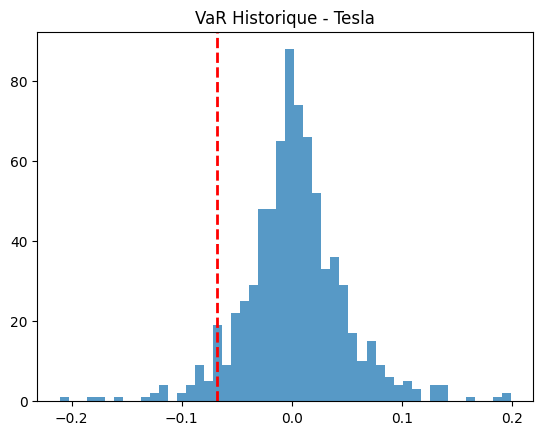

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

data = yf.download("TSLA", start="2020-01-01", end="2023-01-01")['Adj Close'].pct_change().dropna()
plt.hist(data, bins=50, alpha=0.75)
plt.axvline(np.percentile(data, 5), color='r', linestyle='dashed', linewidth=2)
plt.title("VaR Historique - Tesla")
plt.show()


Ok maintenant la meme value at risk mais avec le modele de montecarlo

In [3]:
import yfinance as yf
import numpy as np

data = yf.download("TSLA", start="2020-01-01", end="2023-01-01")['Adj Close'].pct_change().dropna()
simulations = np.percentile(np.sort([np.random.choice(data, size=len(data), replace=True).mean() for _ in range(100)]), 5)
print(f"VaR Monte Carlo: {simulations*100:.2f}%")


[*********************100%%**********************]  1 of 1 completed

VaR Monte Carlo: 0.05%


Ok maintenant visualisons

[*********************100%%**********************]  1 of 1 completed


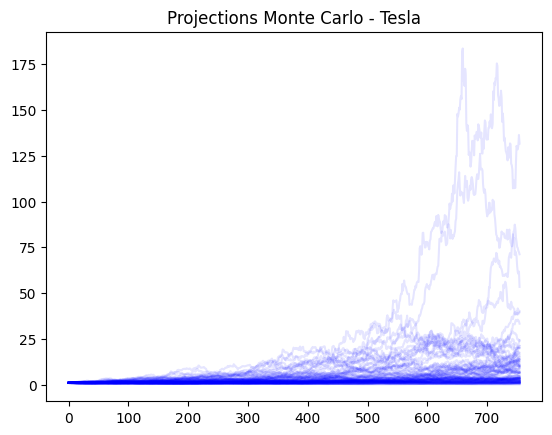

In [4]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

data = yf.download("TSLA", start="2020-01-01", end="2023-01-01")['Adj Close'].pct_change().dropna()
simulations = [np.cumprod(np.random.choice(data, size=len(data), replace=True) + 1) for _ in range(100)]
plt.plot(np.array(simulations).T, color='blue', alpha=0.1)
plt.title("Projections Monte Carlo - Tesla")
plt.show()


Maintenant nous allons faire la value at risk paramétrique

In [5]:
import yfinance as yf
import numpy as np

data = yf.download("TSLA", start="2020-01-01", end="2023-01-01")['Adj Close'].pct_change().dropna()
mean, std = np.mean(data), np.std(data)
VaR = mean - 1.65 * std
print(f"VaR Paramétrique: {VaR*100:.2f}%")


[*********************100%%**********************]  1 of 1 completed

VaR Paramétrique: -7.20%


Ok maintenant visualisons

[*********************100%%**********************]  1 of 1 completed


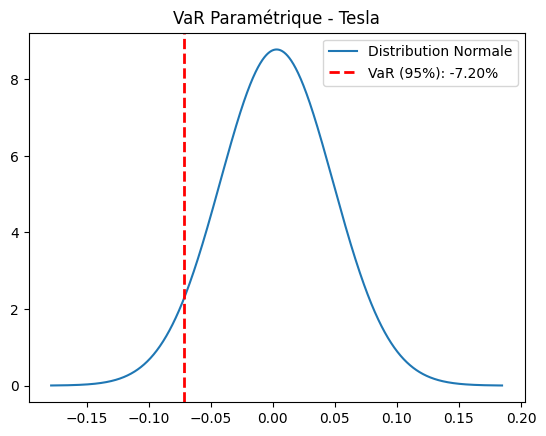

In [6]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

data = yf.download("TSLA", start="2020-01-01", end="2023-01-01")['Adj Close'].pct_change().dropna()
mean, std = np.mean(data), np.std(data)
VaR = mean - 1.65 * std

# Générer la distribution normale des rendements
x = np.linspace(mean - 4*std, mean + 4*std, 1000)
y = stats.norm.pdf(x, mean, std)

# Visualisation
plt.plot(x, y, label='Distribution Normale')
plt.axvline(VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR (95%): {VaR*100:.2f}%')
plt.title("VaR Paramétrique - Tesla")
plt.legend()
plt.show()
